# Week 2 — Data Understanding, EDA & Prediction
Project: Carbon Emission Reduction Forecast using Machine Learning
Author: Aakriti Gupta


In [5]:
# Cell 1: Imports & upload dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload your dataset (choose your file when prompted)
print("Upload the file:  annual carbon emission data.csv")
uploaded = files.upload()   # choose your carbon_emission_data.csv


Upload the file:  annual carbon emission data.csv


Saving annual carbon emission data.csv to annual carbon emission data (2).csv


In [7]:
# Cell 2: Load CSV and display
df = pd.read_csv("annual carbon emission data.csv")
df.head(8)


,Entity,Code,Year,Annual CO₂ emissions
0,Brazil,BRA,1856,227193.0
1,Brazil,BRA,1857,269048.0
2,Brazil,BRA,1858,284547.0
3,Brazil,BRA,1859,372714.0
4,Brazil,BRA,1860,434898.0
5,Brazil,BRA,1861,410068.0
6,Brazil,BRA,1862,355327.0
7,Brazil,BRA,1863,425965.0


In [8]:
# Cell 3: Info & cleaning basics
print("Shape:", df.shape)
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

# Rename columns to easy names (adjust if your CSV columns are different)
# Common OWID columns: 'Entity', 'Code', 'Year', 'Annual CO₂ emissions'
df = df.rename(columns={
    'Entity': 'Country',
    'Code': 'Code',
    'Year': 'Year',
    'Annual CO₂ emissions': 'CO2_Emissions'  # exact column name may vary; adjust if needed
})
df['CO2_Emissions'] = pd.to_numeric(df['CO2_Emissions'], errors='coerce')  # convert if strings
df.isnull().sum()


Shape: (1386, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                1386 non-null   object 
 1   Code                  1386 non-null   object 
 2   Year                  1386 non-null   int64  
 3   Annual CO₂ emissions  1386 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 43.4+ KB

Missing values per column:
 Entity                  0
Code                    0
Year                    0
Annual CO₂ emissions    0
dtype: int64


,0
Country,0
Code,0
Year,0
CO2_Emissions,0


In [9]:
# Cell 4: Drop rows missing CO2 values and optionally keep recent years
df = df.dropna(subset=['CO2_Emissions']).copy()
# Optional: keep 1960 onwards or 2000 onwards for a cleaner trend
# df = df[df['Year'] >= 1960]
print("After dropna Shape:", df.shape)


After dropna Shape: (1386, 4)


In [10]:
# Cell 5: Stats and counts
print("Total countries:", df['Country'].nunique())
print("Year range:", int(df['Year'].min()), "-", int(df['Year'].max()))
df['CO2_Emissions'].describe()


Total countries: 7
Year range: 1750 - 2023


,CO2_Emissions
count,1.386000e+03
mean,7.207983e+08
std,1.546393e+09
min,2.271930e+05
25%,2.416988e+07
50%,1.851900e+08
75%,5.575047e+08
max,1.190250e+10


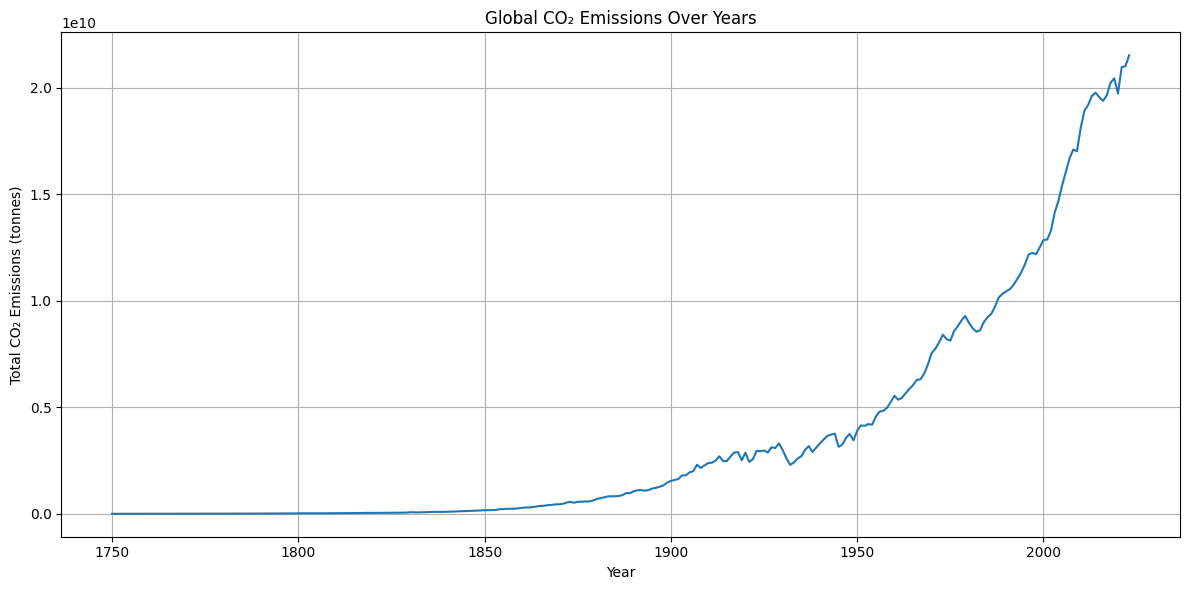

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Cell 6: Global emissions trend (sum across all countries)
global_emission = df.groupby('Year')['CO2_Emissions'].sum()

plt.figure(figsize=(12,6))
plt.plot(global_emission.index, global_emission.values)
plt.title("Global CO₂ Emissions Over Years")
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (tonnes)")
plt.grid(True)
plt.tight_layout()
plt.savefig("global_co2_trend.png", dpi=150)  # saved to Colab filesystem
plt.show()

# Offer file for download
files.download("global_co2_trend.png")


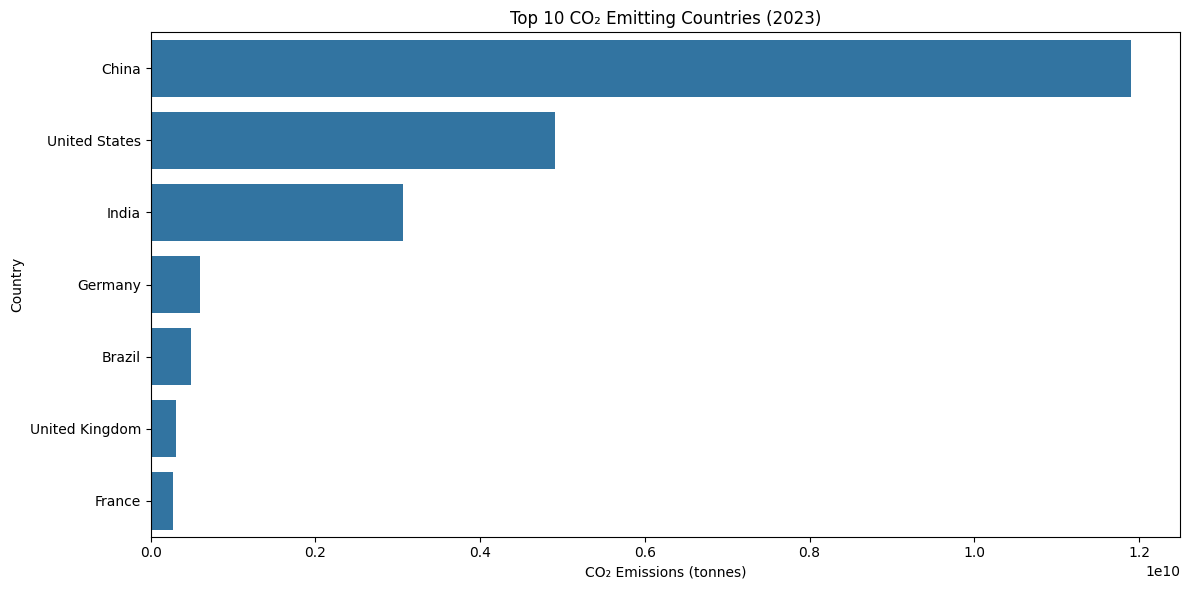

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Cell 7: Top 10 emitters in latest year
latest = int(df['Year'].max())
top_countries = df[df['Year'] == latest].sort_values(by='CO2_Emissions', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_countries['Country'], x=top_countries['CO2_Emissions'])
plt.title(f"Top 10 CO₂ Emitting Countries ({latest})")
plt.xlabel("CO₂ Emissions (tonnes)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_emitters.png", dpi=150)
plt.show()

files.download("top10_emitters.png")


In [13]:
# Cell 8: Prepare aggregated dataset for prediction (global)
agg = df.groupby('Year')['CO2_Emissions'].sum().reset_index()
agg.head()


,Year,CO2_Emissions
0,1750,9305937.0
1,1751,9407229.0
2,1752,9505168.0
3,1753,9610490.0
4,1754,9733580.0


In [15]:
# Cell 9: Train-test split and Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = agg[['Year']].values    # shape (n,1)
y = agg['CO2_Emissions'].values

# Train/test split (keep random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)


MSE: 1.2805730867708099e+19
R2: 0.6623401883275715


In [16]:
# Cell 10: Predict future years
future_years = np.array([[2025],[2026],[2027],[2028],[2029],[2030]])
future_preds = model.predict(future_years)

future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_CO2_Emissions': future_preds
})
print(future_df)

# Save predictions CSV
future_df.to_csv("predicted_co2_2025_2030.csv", index=False)
files.download("predicted_co2_2025_2030.csv")


   Year  Predicted_CO2_Emissions
0  2025             1.105115e+10
1  2026             1.110534e+10
2  2027             1.115954e+10
3  2028             1.121374e+10
4  2029             1.126794e+10
5  2030             1.132214e+10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

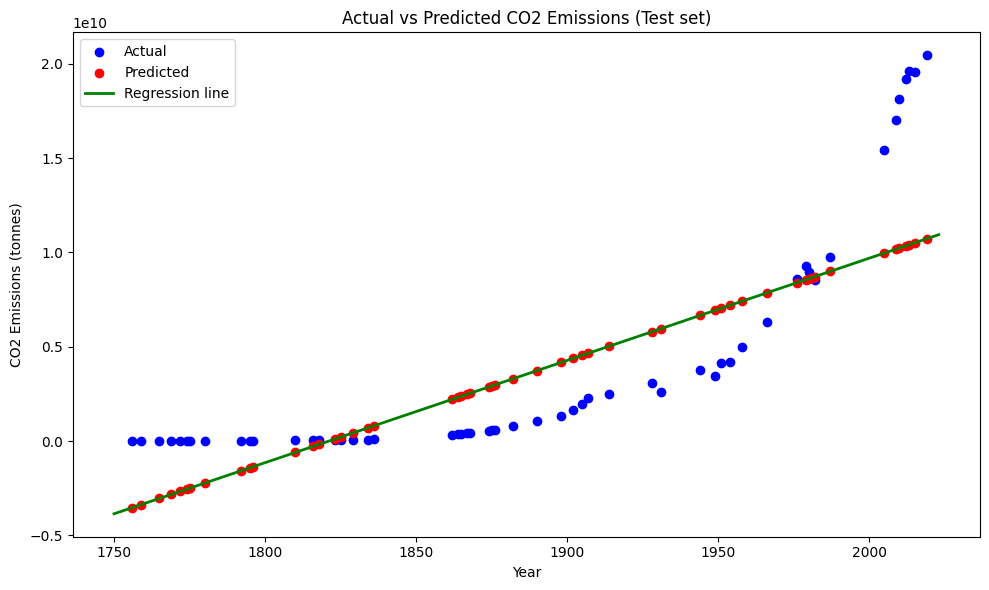

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Cell 11: Plot actual vs predicted for test set
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred, label='Predicted', color='red')
# sorted line for model
xs = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(xs, model.predict(xs), color='green', linewidth=2, label='Regression line')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tonnes)')
plt.title('Actual vs Predicted CO2 Emissions (Test set)')
plt.legend()
plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=150)
plt.show()

files.download("actual_vs_predicted.png")
